<a href="https://colab.research.google.com/github/MartyWeissman/PythonForMathematics/blob/main/Math152_Feb4_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teaching notebook, Math 152, Feb 4, 2021

A few ideas for analyzing "dynamical systems"

The logistic equation is:
$$P_{t+1} = c \cdot \frac{P_t (K - P_t)}{K}.$$
Here $P_t$ represents the population at time $t$.  The constant $K$ represents the "carrying capacity" -- the maximum population that the environment can support.  The constant $c$ represents a rate of population growth.

An equilibrium will be reached if $P_{t+1} = P_t$, which occurs at 
$$P = K \cdot \frac{c-1}{c}.$$

Let's begin by implementing some formulas as Python functions, with some default values of $K$ and $c$.

In [18]:
def logistic(P, c=1.5, K = 1000):
  return c * P * (K-P) / K

def equilibrium(c=1.5, K=1000):
  return K * (c-1) / c

In [12]:
def log_steps(P_start = 5.0, num_steps=10, c=1.5, K=1000):
  P = 
  P_list = 
  for n in range(num_steps):
    P = 
    P_list.append(P)
  return P_list

In [13]:
log_steps(5)

[5,
 7.4625,
 11.110216640625001,
 16.48016959023507,
 24.312860400768244,
 35.5826178298515,
 51.474742707339345,
 73.23764035582884,
 101.81083258640868,
 137.16808043170644,
 177.529497213581]

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def plot_logistic(P_start, num_steps=10, c=1.5, K=1000):
  P_list = log_steps(P_start, num_steps, c, K)
  x_list = range(len(P_list))
  sns.set_style('whitegrid')
  fig,ax = plt.subplots(1,1,figsize=(10,4)) # Create a figure with 1 row and 1 column, 6 inches by 4 inches.
  plt.plot(x_list, P_list, marker='o') # Line plot with dots at time points.
  ax.axhline(equilibrium(c,K), color='red', alpha=0.5)
  plt.show()


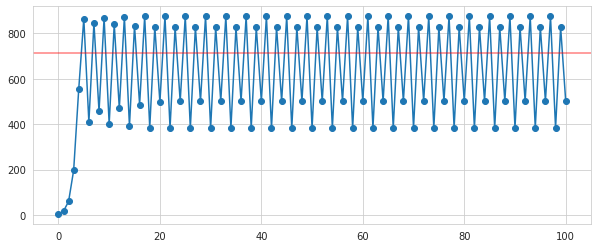

In [27]:
plot_logistic(5, c=3.5, num_steps=100)

In [30]:
import numpy as np
np.arange(2.0,5.0,0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
       3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
       4.6, 4.7, 4.8, 4.9])

In [48]:
def verhulst(P_start=5.0, num_steps=200, K=1000):
  sns.set_style('whitegrid')
  fig,ax = plt.subplots(1,1,figsize=(8,6))
  for c in np.arange(2.0, 4.0, 0.01):
    eq = equilibrium(c,K)
    plt.scatter(c, eq, color='red', s=3.0)
    P_list = log_steps(P_start, num_steps, c, K)
    y_list = P_list[50:]
    x_list = [c]*len(y_list)
    plt.scatter(x_list, y_list, color='k', s=1.0)
  plt.show()

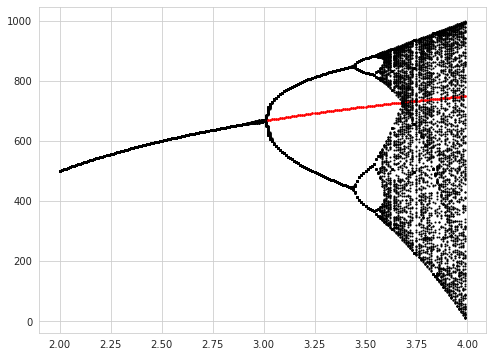

In [50]:
verhulst()